Gender-Career IAT US ONLY

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets

sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


In [2]:
usadf = pd.read_csv('data/fin_1.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
usadf.head()

,Unnamed: 0,session_id,month,year,hour,Implicit Measure,assocareer,assofamily,impcareer,impfamily,...,havechildren,raceomb,occu_bp,assocareer_int,religionid_int,edu_int,impfamily_int,impcareer_int,assofamily_int,political_int
0,0,2.631936e+09,1.0,2018,0.0,-0.121946,Neither male nor female,Neither male nor female,Somewhat important,Very important,...,NaN,Not Reported,NaN,4.0,1.0,NaN,4.0,3.0,4.0,3.0
1,2,2.631936e+09,1.0,2018,1.0,0.632007,Neither male nor female,Neither male nor female,Very important,Extremely important,...,NaN,Not Reported,NaN,4.0,4.0,NaN,5.0,4.0,4.0,NaN
2,4,2.631936e+09,1.0,2018,1.0,0.181949,Strongly female,Strongly female,Extremely important,Extremely important,...,NaN,White,Food service,1.0,1.0,5.0,5.0,5.0,1.0,3.0
3,9,2.631936e+09,1.0,2018,3.0,0.220309,Neither male nor female,Neither male nor female,Very important,Somewhat important,...,NaN,Black or African American,Unemployed,4.0,1.0,7.0,3.0,4.0,4.0,7.0
4,11,2.631936e+09,1.0,2018,4.0,0.463939,Strongly male,Strongly male,Very important,Slightly important,...,NaN,Not Reported,Engineers/Architects,7.0,1.0,9.0,2.0,4.0,7.0,4.0


In [4]:
usa_tests = usadf[usadf["countryres_num"].str.contains("U.S.A.")==True]


In [5]:
usa_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035242 entries, 2 to 1381832
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1035242 non-null  int64  
 1   session_id        1035242 non-null  float64
 2   month             1035242 non-null  float64
 3   year              1035242 non-null  int64  
 4   hour              1035242 non-null  float64
 5   Implicit Measure  1035242 non-null  float64
 6   assocareer        1020125 non-null  object 
 7   assofamily        1019336 non-null  object 
 8   impcareer         1024059 non-null  object 
 9   impfamily         1023659 non-null  object 
 10  anninc            899557 non-null   object 
 11  percentanninc     928188 non-null   object 
 12  countryres_num    1035242 non-null  object 
 13  edu_14            1021919 non-null  float64
 14  politicalid_7     1035242 non-null  object 
 15  STATE             915020 non-null   object 
 16  

In [6]:
usa_tests.year.value_counts()

2020    171341
2019    124256
2018    120690
2017    109398
2016     89583
2015     71035
2014     46589
2013     44237
2012     42157
2009     36268
2011     35140
2010     34187
2006     30981
2008     30498
2007     29818
2005     19064
Name: year, dtype: int64

In [7]:
usa_tests.drop(columns=['Unnamed: 0', 'month', 'hour', 'assofamily', 'impcareer', 
                        'impfamily', 'percentanninc', 'countryres_num', 'havechildren', 
                       'impfamily_int', 'impcareer_int', 'assofamily_int'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
usa_tests.year.value_counts()

2020    171341
2019    124256
2018    120690
2017    109398
2016     89583
2015     71035
2014     46589
2013     44237
2012     42157
2009     36268
2011     35140
2010     34187
2006     30981
2008     30498
2007     29818
2005     19064
Name: year, dtype: int64

In [13]:
usa_2020 = usa_tests[usa_tests["year"]==2020]


In [67]:
usa_2005 = usa_tests[usa_tests['year']==2005]

In [28]:
usa_2020 = usa_2020.dropna()

In [70]:
usa_2005 = usa_2005.drop(columns=['anninc', 'religionid', 'occu_bp', 'religionid_int'])

In [72]:
usa_2005 = usa_2005.dropna()

In [73]:
usa_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16808 entries, 205526 to 233102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session_id        16808 non-null  float64
 1   year              16808 non-null  int64  
 2   Implicit Measure  16808 non-null  float64
 3   assocareer        16808 non-null  object 
 4   edu_14            16808 non-null  float64
 5   politicalid_7     16808 non-null  object 
 6   STATE             16808 non-null  object 
 7   CountyNo          16808 non-null  float64
 8   age               16808 non-null  float64
 9   sex               16808 non-null  object 
 10  raceomb           16808 non-null  object 
 11  assocareer_int    16808 non-null  float64
 12  edu_int           16808 non-null  float64
 13  political_int     16808 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


In [35]:
usa_2020.to_csv('data/usa_2020.csv')

In [30]:
x = usa_2020[['Implicit Measure']]
y = usa_2020[['assocareer_int']]

In [74]:
a = usa_2005[['Implicit Measure']]
b = usa_2005[['assocareer_int']]

In [75]:
regressor20 = LinearRegression()
regressor20.fit(x, y)
y_pred = regressor20.predict(x)

In [76]:
regressor5 = LinearRegression()
regressor5.fit(a, b)
y_pred = regressor5.predict(a)

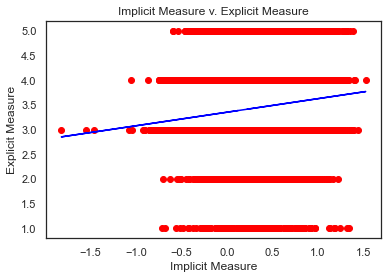

In [79]:
plt.scatter(a, b, color = 'red')
plt.plot(a, regressor5.predict(a), color = 'blue')
plt.title('Implicit Measure v. Explicit Measure')
plt.xlabel('Implicit Measure')
plt.ylabel('Explicit Measure')
plt.show()

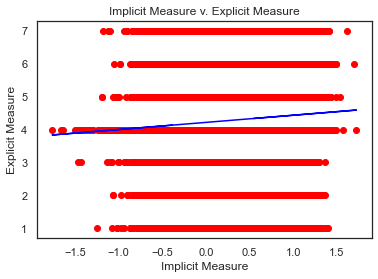

In [77]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor20.predict(x), color = 'blue')
plt.title('Implicit Measure v. Explicit Measure')
plt.xlabel('Implicit Measure')
plt.ylabel('Explicit Measure')
plt.show()

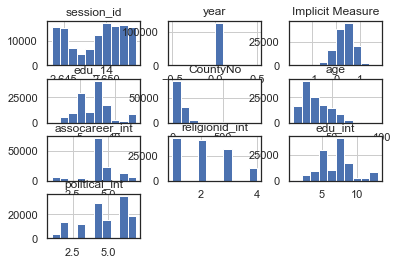

In [37]:
usa_2020.hist();

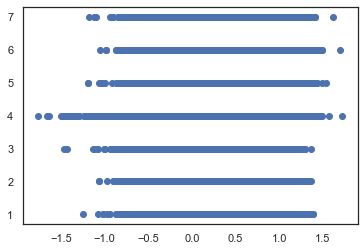

In [39]:
plt.scatter(usa_2020['Implicit Measure'], usa_2020['assocareer_int']);

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
X = pd.DataFrame(usa_2020['Implicit Measure'])
y = pd.DataFrame(usa_2020['assocareer_int'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.004648730938074164, 0.004203989141913778, 0.0036667294719358035]


In [56]:
usa_2020 = usa_2020.rename(columns={"Implicit Measure": "Implicit_Score", "assocareer": "Explicit_Reported"})

In [80]:
import pandas
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = usa_2020[['Implicit_Score', 'assocareer_int', 'edu_int', 'political_int', 'religionid_int', 'age', 'sex']]
print(data.corr())

model = ols("Implicit_Score ~ assocareer_int + age + sex + religionid_int + political_int + edu_int", data=data).fit()
print(model.params)
print(model.summary())

                Implicit_Score  assocareer_int   edu_int  political_int  \
Implicit_Score        1.000000        0.064723  0.008918      -0.045152   
assocareer_int        0.064723        1.000000  0.030923      -0.086746   
edu_int               0.008918        0.030923  1.000000       0.125214   
political_int        -0.045152       -0.086746  0.125214       1.000000   
religionid_int        0.053628        0.023754 -0.037475      -0.395356   
age                   0.058597        0.031192  0.520909      -0.011916   

                religionid_int       age  
Implicit_Score        0.053628  0.058597  
assocareer_int        0.023754  0.031192  
edu_int              -0.037475  0.520909  
political_int        -0.395356 -0.011916  
religionid_int        1.000000  0.052169  
age                   0.052169  1.000000  
Intercept              0.247222
sex[T.Male]           -0.122047
sex[T.Not Reported]   -0.100972
assocareer_int         0.024847
age                    0.002061
religionid_in